In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#from sklearn.manifold import TSNE
import umap.umap_ as umap

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving West_australia.csv to West_australia.csv


In [ ]:
#df = pd.read_csv("../Datasets/West_australia.csv")
df=read_csv("West_australia.csv")
df = df.dropna(axis="rows", how="any")
df= df[df['rainfall_mm'] != 0]
df

,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m
16690,3.6,10.3,22.1,16.20,11.8,25.4
16700,2.0,20.1,30.5,25.30,10.4,7.5
16701,1.4,20.2,31.9,26.05,11.7,31.0
16703,0.6,17.7,25.7,21.70,8.0,30.2
16708,3.4,15.9,22.6,19.25,6.7,2.6
...,...,...,...,...,...,...
26498,5.0,8.2,22.5,15.35,14.3,30.2
26515,0.6,13.7,24.5,19.10,10.8,30.7
26523,7.0,17.8,24.7,21.25,6.9,18.4
26538,0.4,16.3,23.2,19.75,6.9,26.8


In [ ]:
target = df['rainfall_mm']
features = df.drop('rainfall_mm', axis=1)

In [ ]:
# Perform Umap
umap = umap.UMAP(n_components=3, random_state=0)
Umap_data = umap.fit_transform(features)

In [ ]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_features = Umap_data[:train_size]
train_target = target[:train_size]
test_features = Umap_data[train_size:]
test_target = target[train_size:]

In [ ]:
test_target

24611    13.0
24612     4.2
24613     0.4
24614     3.6
24615    12.6
         ... 
26498     5.0
26515     0.6
26523     7.0
26538     0.4
26539     0.6
Name: rainfall_mm, Length: 538, dtype: float64

In [ ]:
# train a linear regression model on the training data
lr = LinearRegression()
lr.fit(train_features, train_target)

LinearRegression()

In [ ]:
# make predictions on the testing data
predictions = lr.predict(test_features)

In [ ]:
# evaluate the model's performance
mse = np.mean((predictions - test_target)**2)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 57.27


In [ ]:
r2_score(test_target,predictions)

0.13000208546828507

<ipython-input-20-b2d6388207d5>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(test_target, fit_fn(test_target), '--k', linewidth=1.5, c= "Red")


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

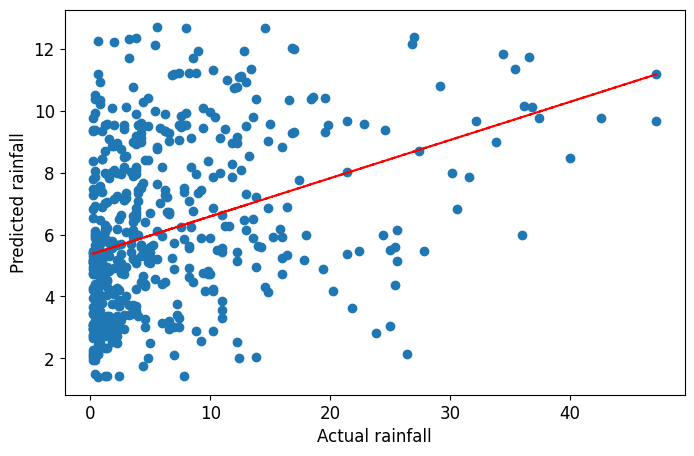

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.scatter(test_target,predictions)
fit = np.polyfit(test_target, predictions, 1)
fit_fn = np.poly1d(fit)
plt.plot(test_target, fit_fn(test_target), '--k', linewidth=1.5, c= "Red")
plt.xlabel('Actual rainfall', fontsize=12)
plt.ylabel('Predicted rainfall',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Predicting Rainfall from Weather Data - West Australia',fontsize=18)

In [ ]:
pred_y_df = pd.DataFrame({'Actual_Value':test_target,'Predictd_Value':predictions, 'Difference':test_target-predictions})
predict=pred_y_df[0:20]
predict

,Actual_Value,Predictd_Value,Difference
24611,13.0,9.518609,3.481391
24612,4.2,9.137239,-4.937239
24613,0.4,3.996377,-3.596377
24614,3.6,8.998681,-5.398681
24615,12.6,8.079883,4.520117
24619,13.0,10.952806,2.047194
24620,3.8,6.535243,-2.735243
24621,4.6,3.027194,1.572806
24631,0.4,3.643554,-3.243554
24634,0.4,2.761767,-2.361767


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

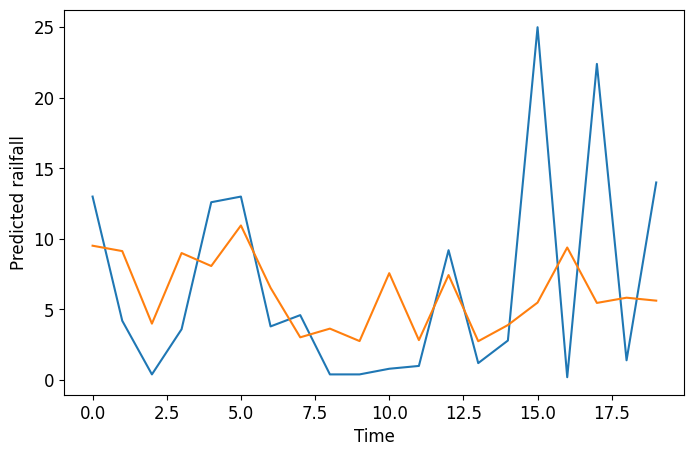

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.plot(predict["Actual_Value"].values)
plt.plot(predict["Predictd_Value"].values)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Predicted railfall',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

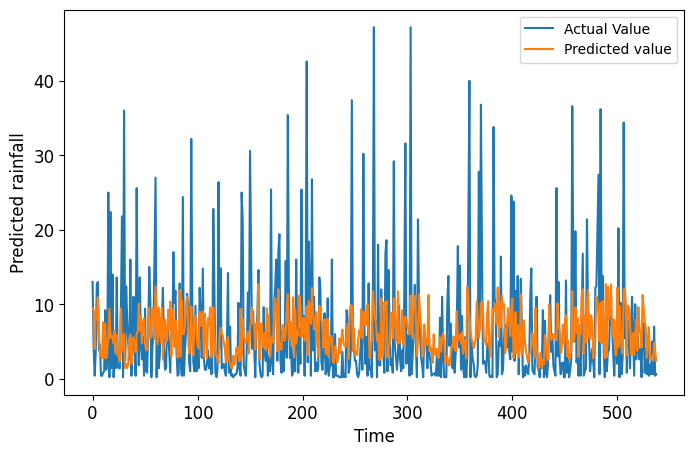

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.plot(pred_y_df["Actual_Value"].values, label ='Actual Value')
plt.plot(pred_y_df["Predictd_Value"].values, label='Predicted value')
plt.legend()
plt.xlabel('Time', fontsize=12)
plt.ylabel('Predicted rainfall',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)